# Introducción

*Planteamiento del problema*

Clasificación de cartas de una baraja, tanto por palo, como por número o figura (rey, reina, jota)

# Datos

*Descripción (incluyendo fuente), análisis, separación en entrenamiento y prueba y preprocesamiento (de ser necesario) del dataset empleado*

Este dataset fue obtenido de kaggle

https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification

El dataset contiene imagenes de cartas de tamaño 224 X 224 X 3 en formato jpg. El dataset ya esta dividido en conjuntos de entrenamiento, validación y testing y cada uno de estos esta particionado en los 53 diferentes tipos de cartas .

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Directorio donde esta guardado el dataset
%cd "/content/drive/MyDrive/Concentracion IA/Bloque 2/Deep Learning"

/content/drive/MyDrive/Concentracion IA/Bloque 2/Deep Learning


In [ ]:
!unzip -qq data.zip

In [4]:
import os, shutil, pathlib
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    pathlib.Path("EVALUACION") / "train",
    image_size=(224, 224),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    pathlib.Path("EVALUACION") / "valid",
    image_size=(224, 224),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    pathlib.Path("EVALUACION") / "test",
    image_size=(224, 224),
    batch_size=32)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


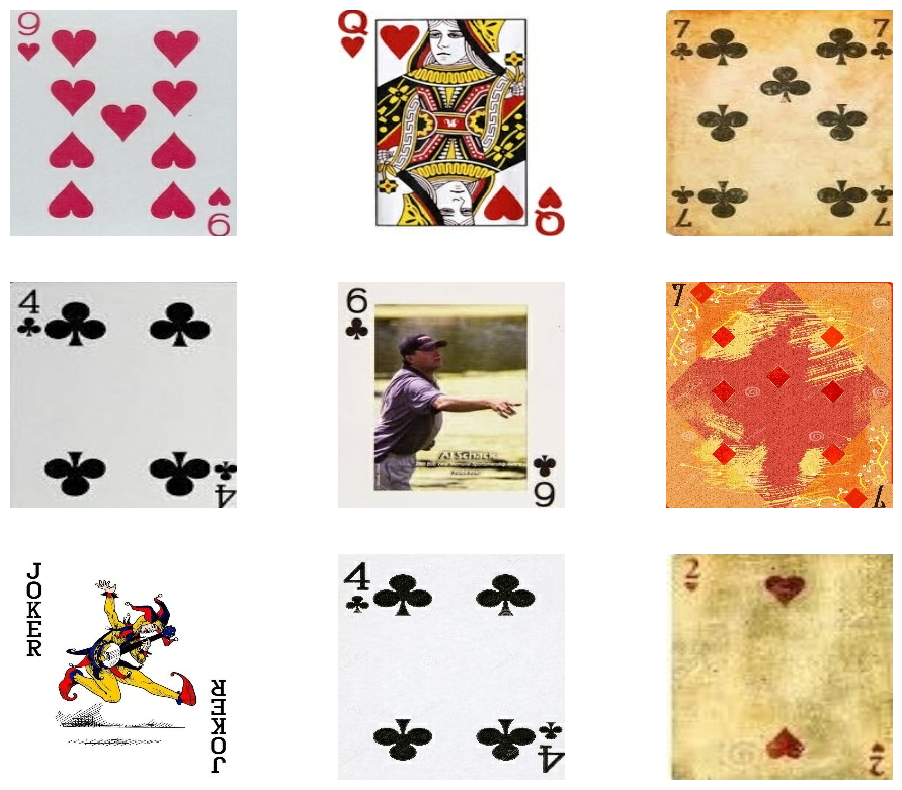

In [ ]:
import matplotlib.pyplot as plt

class_names = ['ace of clubs', 'ace of diamons', 'ace of hearts', 'ace of spades']

plt.figure(figsize=(12, 10))
index = 0
for element in train_dataset.take(1):
  for i in range(9):
    image = element[0][i]
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image/255, interpolation="nearest")
    plt.axis("off")

plt.show()

# Desarrollo del modelo

*Descripción de la arquitectura empleada, entrenamiento y evaluación de resultados*

La arquitectura es una red neuronal convolucional que tiene de tres bloques de capas convolucionales con capas de pooling. Al final, se utilizan capas densas para realizar la clasificación.

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(224, 224, 3)))

model.add(keras.layers.Conv2D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=2))
model.add(keras.layers.Conv2D(64, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=2))
model.add(keras.layers.Conv2D(128, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(53, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 53)                  │           6,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,175,797 (42.63 MB)

 Trainable params: 11,175,797 (42.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_callback.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1241s 5s/step - accuracy: 0.1930 - loss: 57.0613 - val_accuracy: 0.6377 - val_loss: 1.5299
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 928s 4s/step - accuracy: 0.5876 - loss: 1.6254 - val_accuracy: 0.6604 - val_loss: 1.3767
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 936s 4s/step - accuracy: 0.7776 - loss: 0.8488 - val_accuracy: 0.6792 - val_loss: 1.6104
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 892s 4s/step - accuracy: 0.8628 - loss: 0.5146 - val_accuracy: 0.6604 - val_loss: 1.9080
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 886s 4s/step - accuracy: 0.9272 - loss: 0.3110 - val_accuracy: 0.6717 - val_loss: 2.1835
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 910s 4s/step - accuracy: 0.9528 - loss: 0.2219 - val_accuracy: 0.6943 - val_loss: 2.4314
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 935s 4s/step - accuracy: 0.9607 - loss: 0.1639 - val_accuracy: 0.6528 - val_loss: 2.6862
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 913s 4s/step - accuracy: 0.9529 - loss: 0.2247 - val_ac

## Resultados

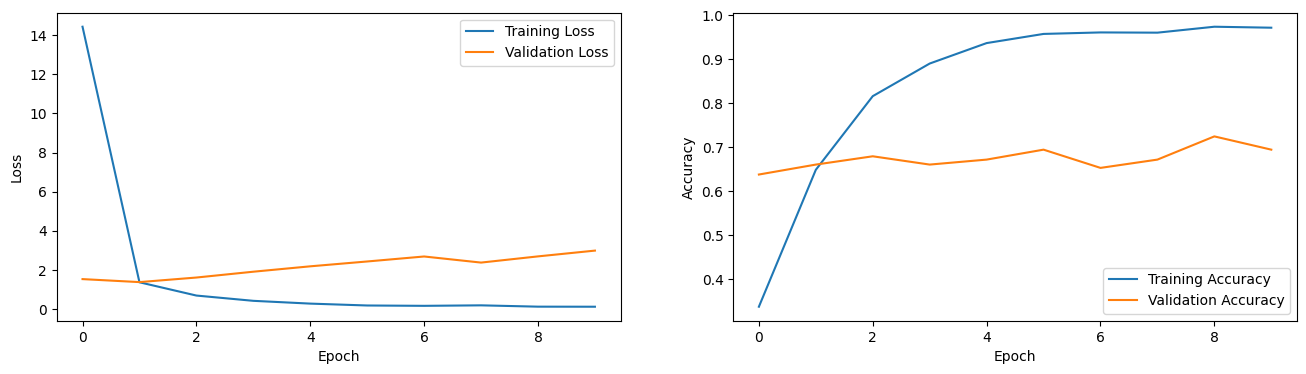

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# model = keras.models.load_model("model_callback.keras")

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.6197 - loss: 3.9445
Test accuracy: 0.660


El modelo presenta un accuracy del 66% pero generamos sobreajuste en el entrenamiento por lo que se puede ver en las gráficas anteriores.

# Ajuste del modelo

 *Ajuste de hiperparámetros/cambios en arquitectura para mejorar resultados previos (al menos una iteración).*

In [8]:
import tensorflow as tf
from tensorflow import keras

model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape=(224, 224, 3)))

model2.add(keras.layers.Conv2D(32, 3, padding='same'))
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"))

model2.add(keras.layers.Conv2D(64, 3, padding='same'))
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"))

model2.add(keras.layers.Conv2D(128, 3, padding='same'))
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"))

model2.add(keras.layers.Conv2D(256, 3, padding='same'))
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"))

model2.add(keras.layers.GlobalAveragePooling2D())

model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.5))

model2.add(keras.layers.Dense(53, activation='softmax'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 53)                  │          13,621 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,829 (1.78 MB)

 Trainable params: 467,829 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
callback = keras.callbacks.ModelCheckpoint(filepath="better_model_callback.keras", save_best_only=True, monitor="val_loss")
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model2.fit(train_dataset, epochs=25, validation_data=validation_dataset, callbacks=[early_stopping, callback])

Epoch 1/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - accuracy: 0.0341 - loss: 3.8609 - val_accuracy: 0.0528 - val_loss: 3.2518
Epoch 2/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.0643 - loss: 3.4183 - val_accuracy: 0.0906 - val_loss: 2.9561
Epoch 3/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.1093 - loss: 3.1304 - val_accuracy: 0.1283 - val_loss: 2.6847
Epoch 4/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step - accuracy: 0.1398 - loss: 2.8978 - val_accuracy: 0.1887 - val_loss: 2.3430
Epoch 5/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.1837 - loss: 2.6281 - val_accuracy: 0.2415 - val_loss: 2.1875
Epoch 6/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.2197 - loss: 2.4138 - val_accuracy: 0.2453 - val_loss: 2.0727
Epoch 7/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.2585 - loss: 2.2278 - val_accuracy: 0.3057 - val_loss: 1.8626
Epoch 8/25
239/239 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.2870 - loss: 2

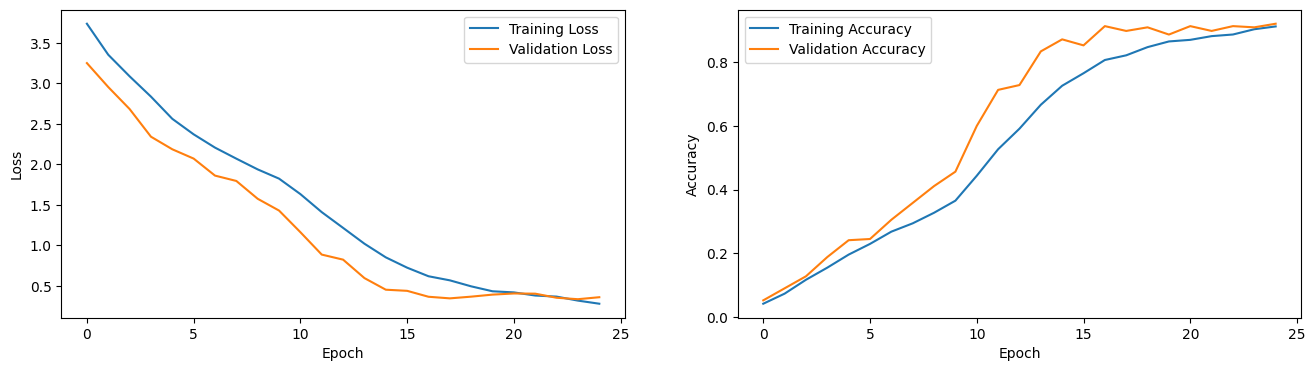

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# model = keras.models.load_model("better_model_callback.keras")

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Resultados

*Evaluación de modelo final con datos de prueba*

In [14]:
test_loss, test_acc = model2.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.8766 - loss: 0.8001
Test accuracy: 0.883


# Conclusiones

*Análisis de los resultados obtenidos, identificación de posibles áreas de mejora*

En este segundo modelo, agregue un bloques más de capa convolucional, 4 en total para capturar más filtros y en cada uno de estos bloques agregue la opción de padding same para mantener las dimensiones de los features de salida.
Igualmente en las capas de max pooling cambie el tamaño de la ventana a 3x3 para reducir las dimensiones más gradualmente.

Por otro lado, cambie la capa de flatten por una de global average pooling, lo que ayudo a reducir las dimensiones y ayudo a evitar el sobreajuste y número de parámetros, haciendo la red más ligera. De igual forma para evitar el sobreajuste use una capa de Dropout.

Finalmente creo que las mejoras ayudaron significativamente dandonos un accuracy de 88% aproximadamente y las capas adicionales resolvieron bastante el problema del sobreajuste. Probablemente entrenandolo más epocas o posiblemente usando capas de data augmentation podría mejorar aun más este modelo.

# Aplicación

*Función para probar modelo con datos nuevos*

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Lista de nombres de las clases
clases = ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades',
          'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades',
          'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades',
          'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades',
          'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades',
          'joker', 'king of clubs', 'king of diamonds', 'king of hearts',
          'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts',
          'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts',
          'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts',
          'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts',
          'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts',
          'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts',
          'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts',
          'two of spades']

def leer_carta(ruta_imagen, modelo):
    # Cargar la imagen
    img = image.load_img(ruta_imagen, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para el batch

    # Hacer la predicción
    predicciones = modelo.predict(img_array)
    clase_predicha_index = np.argmax(predicciones, axis=1)

    clase_predicha = clases[clase_predicha_index[0]]

    return clase_predicha_index, clase_predicha, img

In [ ]:
from google.colab import files
uploaded = files.upload()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


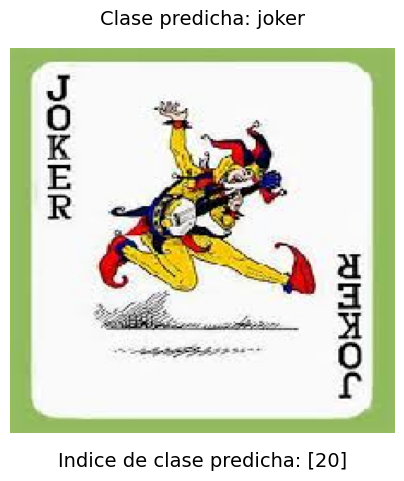

In [46]:
# Ejemplo de uso
# modelo = keras.models.load_model('/modelM2.keras')
indice, resultado, imagen = leer_carta('carta_joker.jpeg', model2)

plt.figure(figsize=(5,5))
plt.imshow(imagen)
plt.axis('off')
plt.text(0.5, 1.05, f'Clase predicha: {resultado}', ha='center', va='bottom', fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, -0.05, f'Indice de clase predicha: {indice}', ha='center', va='top', fontsize=14, transform=plt.gca().transAxes)
plt.show()

## Exportación del modelo

In [17]:
# Modelo entrenado, arquitectura + pesos en formato .keras
model2.save('modelM2.keras')